
# Feature Extraction with DINO ViT-S/14

This notebook demonstrates how to perform feature extraction using the DINO ViT-S/14 model. We'll process an image, extract its features, and visualize these features using PCA.


In [86]:

import torch
from PIL import Image
import torchvision.transforms as T
import hubconf
import matplotlib.pyplot as plt



## Load the DINO ViT-S/14 Model

First, we load the DINO ViT-S/14 model using a pre-defined hub configuration.


In [157]:

dinov2_vitx14 = hubconf.dinov2_vitl14()


# Move the model to CUDA device
dinov2_vitx14 = dinov2_vits14.to('cuda')


## Image Preprocessing

We load an image, perform necessary transformations, and prepare it for feature extraction.


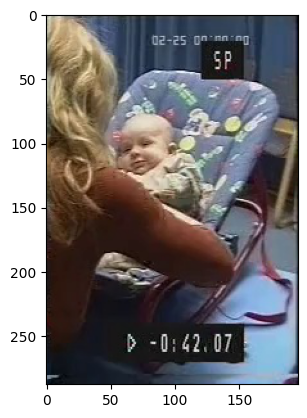

In [158]:

transforms = T.Compose([
        T.Resize(256, interpolation=T.InterpolationMode.BICUBIC),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ])

# Make sure to load your image here
img = Image.open('D:/GitHub/dino/data/output/NP001/infant/frames/frame_0000.jpg')
#img = Image.open('D:\GitHub\dinov2\scripts\data\meta_dog.png')
plt.imshow(img)
img = transform(img)[:3].unsqueeze(0)


            


## Feature Extraction

Extract features from the image using the DINO ViT-S/14 model.


In [159]:

with torch.no_grad():
    inference = dinov2_vitx14.forward_features(img.to('cuda'))

print(inference.keys())


dict_keys(['x_norm_clstoken', 'x_norm_regtokens', 'x_norm_patchtokens', 'x_prenorm', 'masks'])


In [160]:
 inference['x_norm_patchtokens'].shape

torch.Size([1, 256, 1024])

# Visualise first and last 10 features before PCA

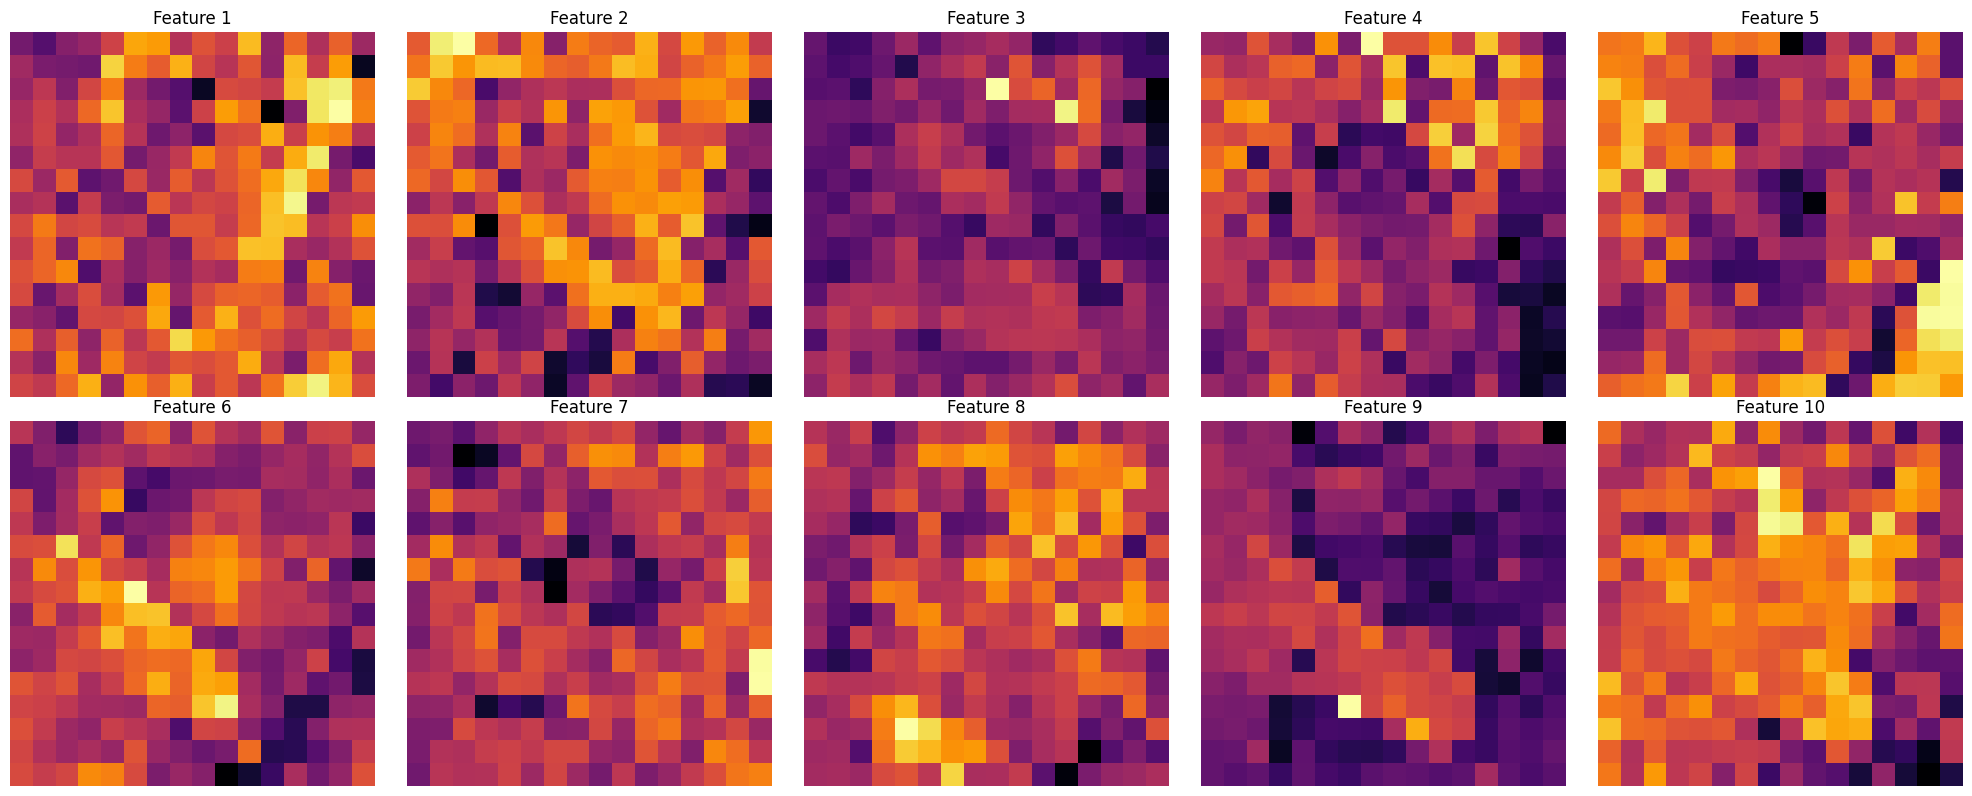

In [161]:


# Normalize each of the first 10 features across all patches
normalized_features = np.empty((256, 10))
for i in range(10):  # Loop over the first 10 features
    min_feat = np.min(features[:, i])
    max_feat = np.max(features[:, i])
    normalized_features[:, i] = (features[:, i] - min_feat) / (max_feat - min_feat) * 255

# Visualize each of the first 10 features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjusted for 10 features
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, ax in enumerate(axes):
    # Treat each feature value as one patch/token and reshape the 256 patches into a 16x16 grid
    feature_image = normalized_features[:, i].reshape(16, 16)
    ax.imshow(feature_image.astype(np.uint8), cmap='inferno')
    ax.set_title(f'Feature {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


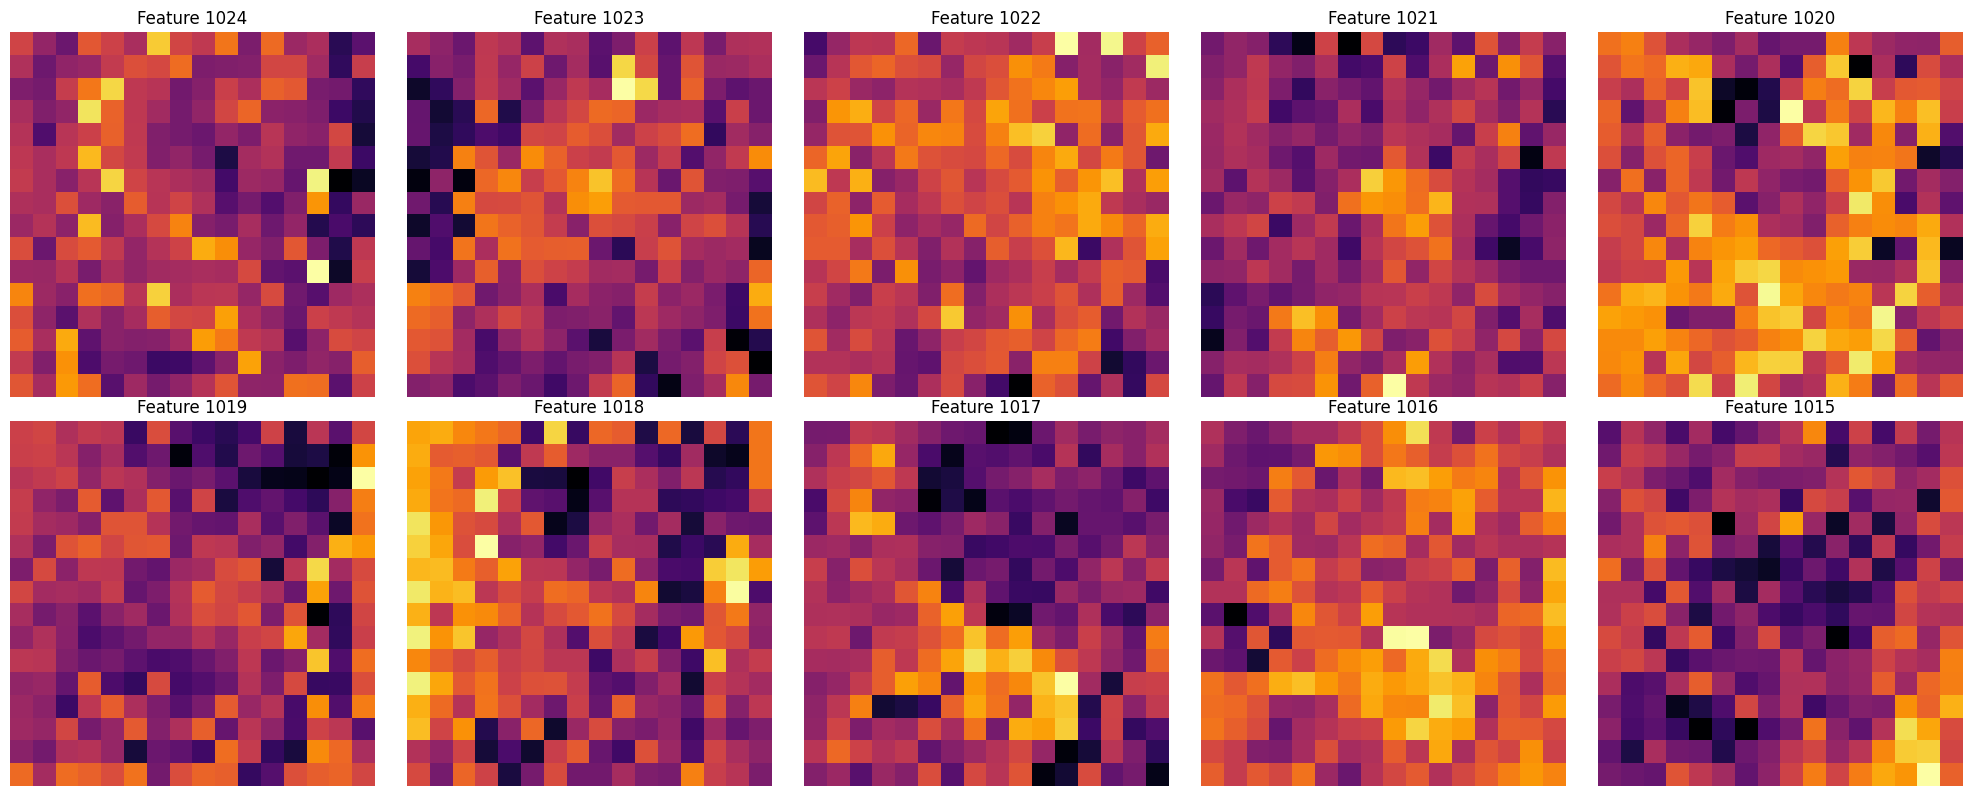

In [162]:
# Assuming `features` is your numpy array of shape (256, 1024)

# Normalize each of the last 10 features across all patches
normalized_features_last = np.empty((256, 10))
for i in range(1, 11):  # Loop over the last 10 features
    min_feat = np.min(features[:, -i])
    max_feat = np.max(features[:, -i])
    normalized_features_last[:, -i] = (features[:, -i] - min_feat) / (max_feat - min_feat) * 255

# Visualize each of the last 10 features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjusted for 10 features
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, ax in enumerate(axes):
    # Treat each feature value as one patch/token and reshape the 256 patches into a 16x16 grid
    feature_image = normalized_features_last[:, -i-1].reshape(16, 16)  # Adjust index for correct visualization order
    ax.imshow(feature_image.astype(np.uint8), cmap='inferno')
    ax.set_title(f'Feature {1024 - i}')
    ax.axis('off')

plt.tight_layout()
plt.show()



## Feature Visualization

We apply PCA to the extracted features and visualize the result.


High-Dimensional Feature Space
Context: Each of the 256 patches (or tokens) from the attention map is represented by afeat_dim = 384 # vits14
feat_dim = 768 # vitb14
feat_dim = 1024 # vitl14
feat_dim = 1536 # vitg144-dimensional feature vector, capturing complex information but challenging to directly analyze or visualize.

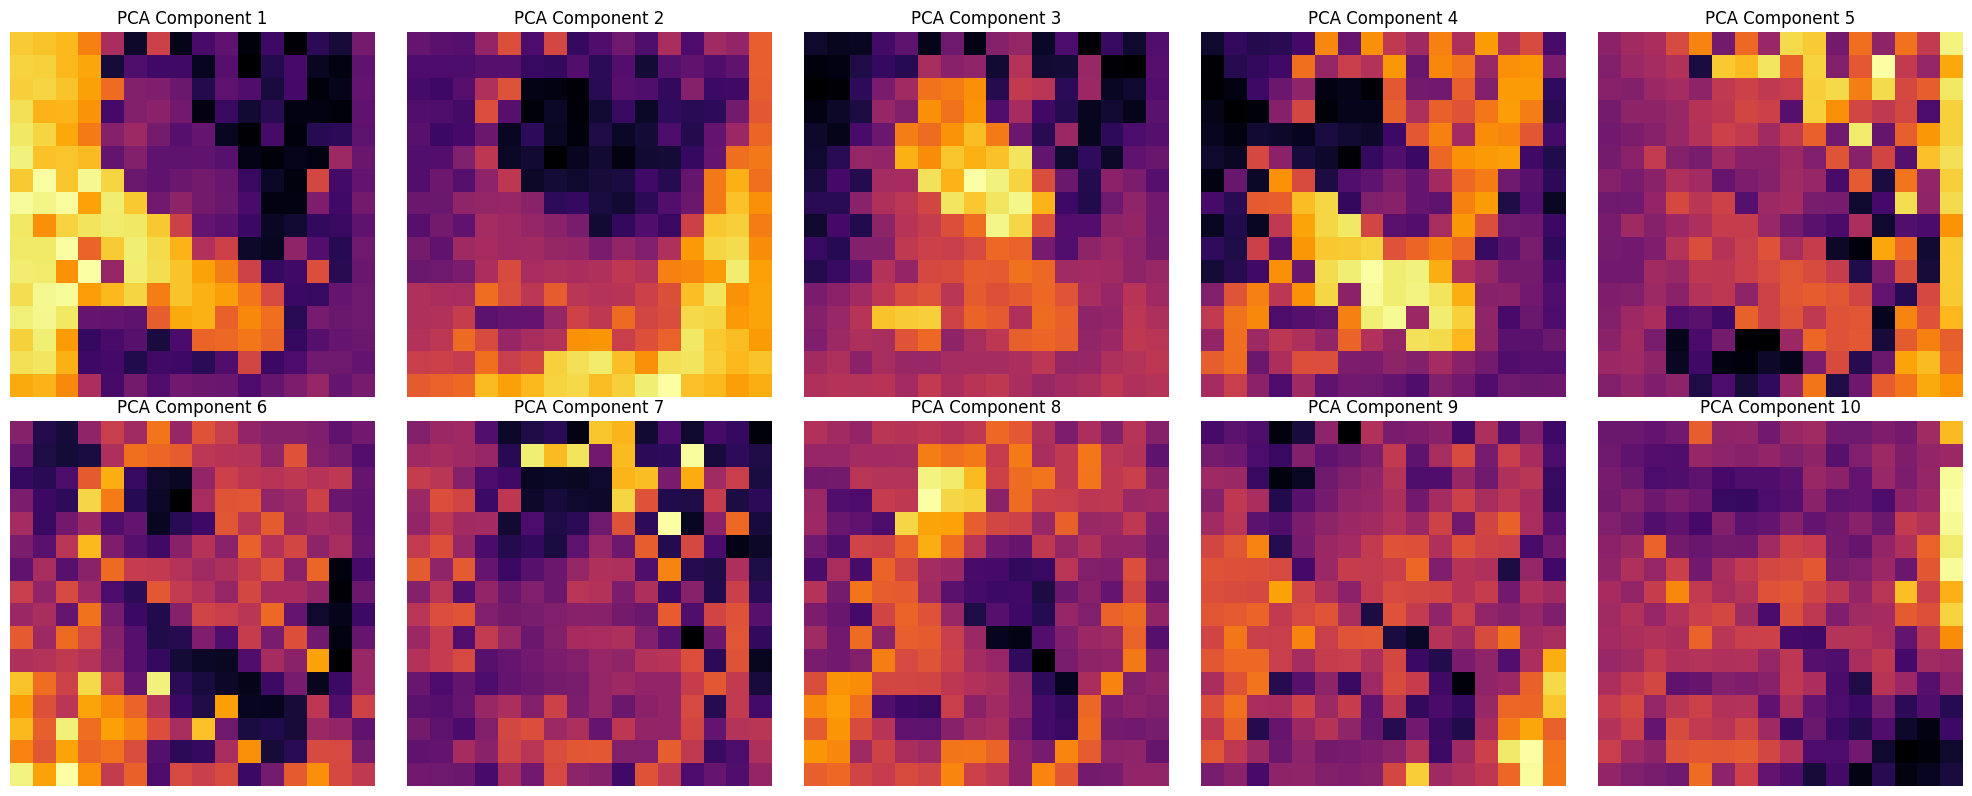

In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming `features` is your input array of shape (256, 1024)

# Apply PCA for the first 10 components
pca = PCA(n_components=10)
pca_features = pca.fit_transform(features)  # Shape: (256, 10)

# Normalize PCA features for visualization
pca_features_normalized = np.empty_like(pca_features)
for i in range(pca_features.shape[1]):  # Loop over each component
    component = pca_features[:, i]
    pca_features_normalized[:, i] = (component - component.min()) / (component.max() - component.min())

# Reshape and scale for visualization
pca_features_normalized *= 255

# Visualize each of the first 10 PCA components
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjusted for 10 components
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, ax in enumerate(axes):
    # Reshape the i-th component to 16x16 for visualization
    component_image = pca_features_normalized[:, i].reshape(16, 16)
    ax.imshow(component_image.astype(np.uint8), cmap='inferno')
    ax.set_title(f'PCA Component {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


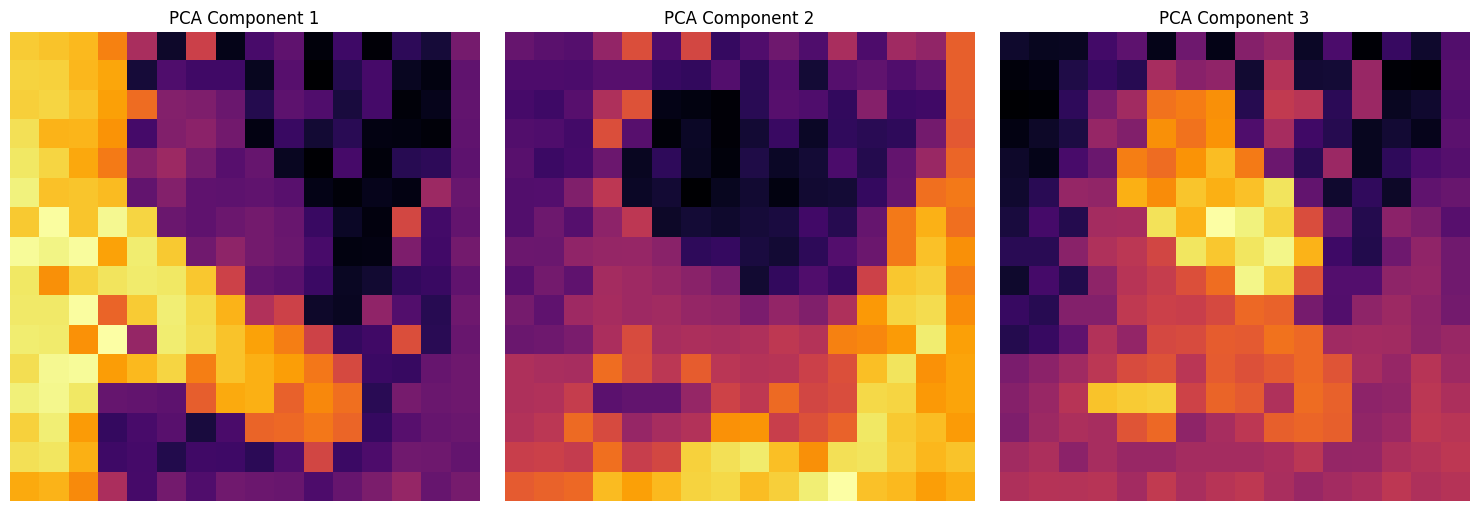

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming `features` is your input array of shape (256, 1024)

# Apply PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)  # Shape: (256, 3)

# Normalize PCA features for visualization
# Normalize each component separately to use the full color range for each
pca_features_normalized = np.empty_like(pca_features)
for i in range(pca_features.shape[1]):  # Loop over each component
    component = pca_features[:, i]
    pca_features_normalized[:, i] = (component - component.min()) / (component.max() - component.min())

# Reshape and scale for visualization
pca_features_normalized *= 255

# Visualize each PCA component
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    # Reshape the i-th component to 16x16 for visualization
    component_image = pca_features_normalized[:, i].reshape(16, 16)
    ax.imshow(component_image.astype(np.uint8), cmap='inferno')
    ax.set_title(f'PCA Component {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


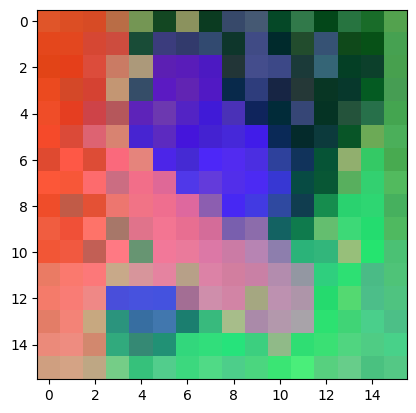

In [165]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


tensor_detached_features = inference['x_norm_patchtokens'].detach()  # Detaches the tensor from the graph
if tensor_detached_features.is_cuda:
    tensor_features = tensor_detached_features.cpu()  # Moves the tensor to CPU if it's on GPU

features = tensor_features.numpy()[0]
features.shape

pca = PCA(n_components=3)
pca.fit(features)
pca_features = pca.transform(features)
pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255

plt.imshow(pca_features.reshape(16, 16, 3).astype(np.uint8))
#plt.savefig('meta_dog_features.png')


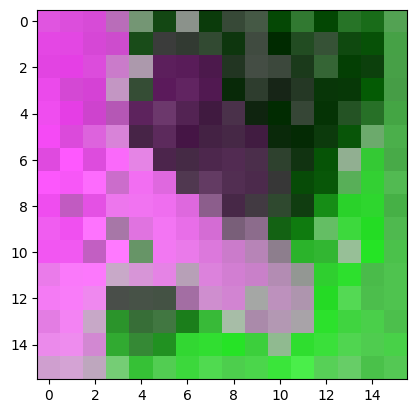

In [166]:
pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)
# Assuming pca_features is the result of PCA with n_components=2

pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255

# Convert to a 3-channel image by duplicating one component
pca_image = np.stack([pca_features[:, 0], pca_features[:, 1], pca_features[:, 0]], axis=-1)
plt.imshow(pca_image.reshape(16, 16, 3).astype(np.uint8))


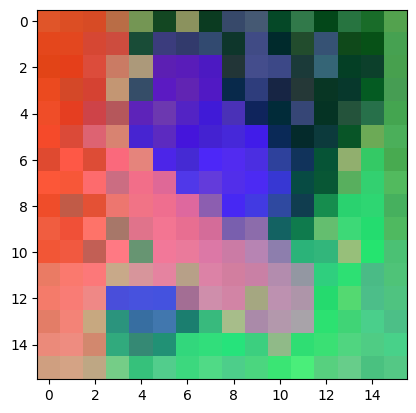

In [167]:
pca = PCA(n_components=5)
pca.fit(features)
pca_features = pca.transform(features)
# Assuming pca_features is the result of PCA with n_components=5
pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255

# Use the first three components for RGB
plt.imshow(pca_features[:, :3].reshape(16, 16, 3).astype(np.uint8))


# Visualize the Explained Variance

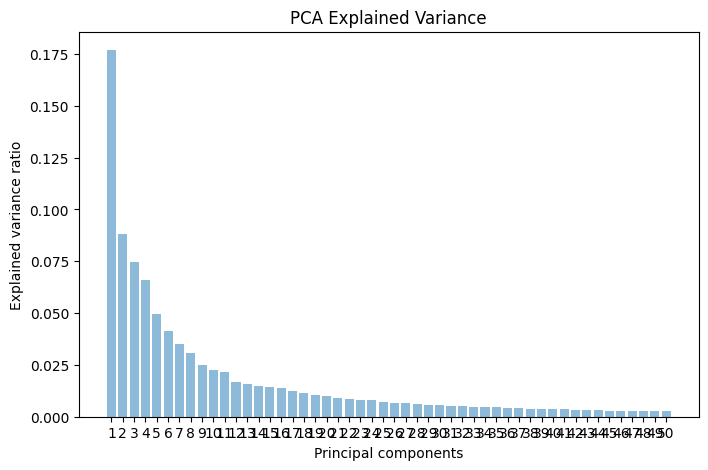

In [168]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=50)
pca.fit(features)

plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Explained Variance')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


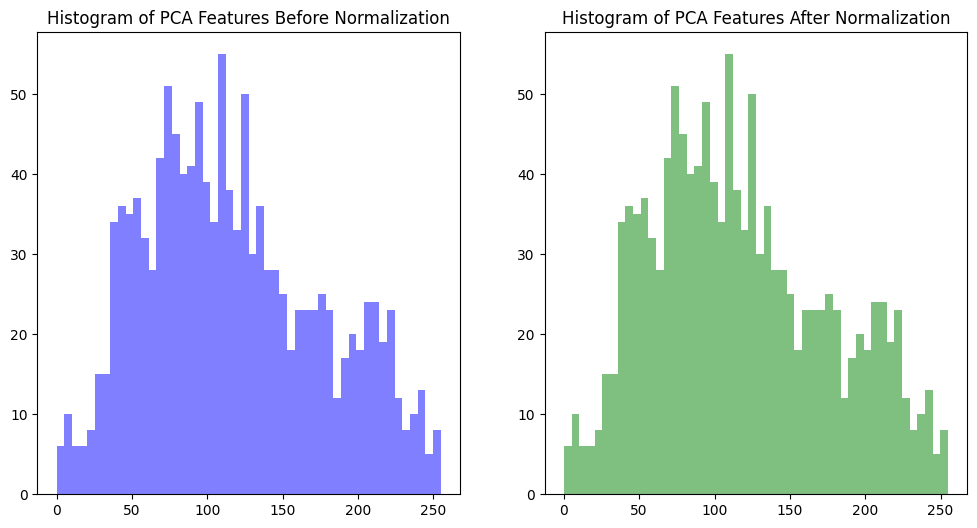

In [169]:
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(pca_features.flatten(), bins=50, color='blue', alpha=0.5)
plt.title('Histogram of PCA Features Before Normalization')

# Perform normalization and scaling
pca_features_normalized = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features_normalized *= 255

# After normalization
plt.subplot(1, 2, 2)
plt.hist(pca_features_normalized.flatten(), bins=50, color='green', alpha=0.5)
plt.title('Histogram of PCA Features After Normalization')

plt.show()


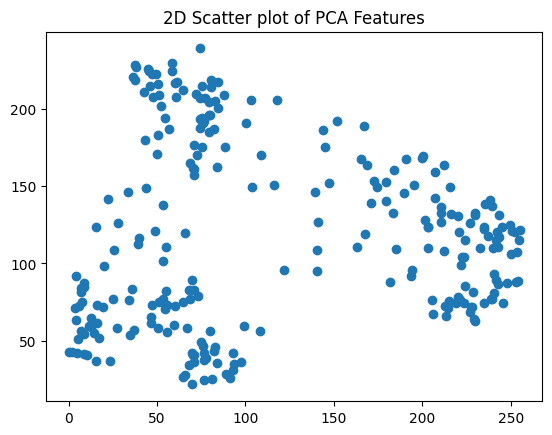

In [170]:
pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)

if pca.n_components_ == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_features_normalized[:,0], pca_features_normalized[:,1], pca_features_normalized[:,2])
    ax.set_title('3D Scatter plot of PCA Features')
    plt.show()
elif pca.n_components_ == 2:
    plt.scatter(pca_features_normalized[:,0], pca_features_normalized[:,1])
    plt.title('2D Scatter plot of PCA Features')
    plt.show()
